# DMT
Mazeworld with discrete morse theory

In [1]:
import sys

sys.path.append("../src")

from environments import LineEnv, GridEnv, MazeEnv
from policies import BaseAgent, QLearningAgent
import matplotlib.pyplot as plt
import networkx as nx


import numpy as np

In [2]:
env = MazeEnv()
agent = BaseAgent(env, gamma=1)
agent.value_iteration()
optimal_value_function = agent.value_function

print("Optimal Value Function:", agent.value_function)
print("Optimal Policy:", agent.policy)

Optimal Value Function: [-30.999341 -29.999341 -28.999342 -18.99953  -17.999533 -16.999537
 -15.999542 -14.999548   0.       -31.999332 -27.999344 -19.999519
 -17.999525 -13.999555  -0.999986 -32.999137 -26.999354 -20.999502
 -18.999507 -12.999568  -1.999966 -31.999152 -25.99937  -21.999479
 -19.999483 -11.999587  -2.99994  -30.999173 -24.999392 -23.99942
 -22.999449 -20.999452 -10.999612  -3.999907 -29.9992   -25.999357
 -23.999413 -21.998748  -9.999644  -4.999868 -28.999234 -27.999274
 -26.999315 -24.99937  -20.998785  -8.999682  -7.999727  -6.999773
  -5.99982  -29.999185 -27.999265 -25.999319 -19.998829  -9.999629
  -6.999766 -30.99913  -28.999209 -26.999262 -18.998881 -10.99957
  -7.999706 -31.999069 -29.999147 -27.999199 -17.998939 -11.99944
 -10.999505  -9.999571  -8.999638 -32.999    -30.999077 -28.999128
 -16.999003 -12.999367  -9.999564 -33.998925 -31.998897 -30.998973
 -29.99905  -15.999075 -14.999154 -13.999234 -12.999315 -11.999397
 -10.99948 ]
Optimal Policy: [1 1 0 1 1 1

In [3]:
env = MazeEnv()
agent = QLearningAgent(env, gamma=1, alpha=0.1)
agent.compute_optimal_q_function()
optimal_q_function = agent.q_table

Optimal Q-function computed.


In [4]:
agent.q_table[0]

array([-32.999332, -30.999341, -31.999341, -31.999341])

In [5]:
optimal_value_function[0]

-30.999340999999998

In [6]:
# check if optimal q is optimal v
np.all(np.max(agent.q_table, axis=-1) == optimal_value_function)

True

# env to graph

TODO: Must be careful about nodes and edges and double counting edges. Define graph exactly as needed. Otherwise we have a wonky discrete morse function calculation. i.e. and edge is defined as connecting two states iff you actually move to that state (no bonking to a wall)

In [7]:

env._state_to_grid.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84])

In [8]:
# sort a tuple (state, next_state) so that it is always in the same order

sorted_tuple = lambda x: tuple(sorted(x))

In [9]:
# Create a directed graph
G = nx.Graph()

node_values = {}
edge_values = {}


# Add vertices (states) to the graph
for state in env._state_to_grid.keys():
    G.add_node(state)
    node_values[state] = np.max(optimal_q_function[state])

# Add edges (actions) to the graph
for state in G.nodes:
    if state in env.terminal_states:
        continue
    for action in range(4):  # There are four possible actions: up, right, down, left
        next_state, reward = env.get_next_state_and_reward(state, action)
        if next_state == state:
            continue
        if sorted_tuple((state, next_state)) in edge_values:
            current_q_value = edge_values[sorted_tuple((state, next_state))]
        else:
            current_q_value = -np.inf

        G.add_edge(state, next_state)
        edge_values[sorted_tuple((state, next_state))] = np.max(
            [optimal_q_function[state][action], current_q_value]
        )

# Now G is the graph representation of the environment
G.nodes(), G.edges(data=True)

(NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84)),
 EdgeDataView([(0, 9, {}), (0, 1, {}), (1, 2, {}), (2, 10, {}), (3, 11, {}), (3, 4, {}), (4, 5, {}), (5, 12, {}), (5, 6, {}), (6, 7, {}), (7, 13, {}), (8, 14, {}), (9, 15, {}), (10, 16, {}), (11, 17, {}), (12, 18, {}), (13, 19, {}), (14, 20, {}), (15, 21, {}), (16, 22, {}), (17, 23, {}), (18, 24, {}), (19, 25, {}), (20, 26, {}), (21, 27, {}), (22, 28, {}), (23, 30, {}), (24, 31, {}), (25, 32, {}), (26, 33, {}), (27, 34, {}), (28, 35, {}), (28, 29, {}), (29, 30, {}), (30, 36, {}), (31, 37, {}), (32, 38, {}), (33, 39, {}), (34, 40, {}), (35, 42, {}), (36, 43, {}), (37, 44, {}), (38, 45, {}), (39, 48, {}), (40, 49, {}), (40, 41, {}), (41, 42, {}), (42,

In [10]:
# Step 1: Define a Real-Valued Function on the Graph
# Assigning a random value to each node
# node_values = {node: float(optimal_value_function[node]) for node in G.nodes}
# edge_values = {(u, v): max(node_values[u], node_values[v]) for u, v in G.edges}

# Adding the values as a node attribute
nx.set_node_attributes(G, node_values, "node_value")
nx.set_edge_attributes(G, edge_values, "edge_value")

In [11]:
list(G.nodes(data=True))[:5]

[(0, {'node_value': -30.999340999999998}),
 (1, {'node_value': -29.999340999999998}),
 (2, {'node_value': -28.999342}),
 (3, {'node_value': -18.999529999999996}),
 (4, {'node_value': -17.999532999999996})]

In [12]:
list(G.edges(data=True))[:5]

[(0, 9, {'edge_value': -31.999332}),
 (0, 1, {'edge_value': -30.999340999999998}),
 (1, 2, {'edge_value': -29.999340999999998}),
 (2, 10, {'edge_value': -28.999342}),
 (3, 11, {'edge_value': -19.999518999999996})]

In [13]:
G.nodes[0]

{'node_value': -30.999340999999998}

In [14]:
G[0]

AtlasView({9: {'edge_value': -31.999332}, 1: {'edge_value': -30.999340999999998}})

In [15]:
import networkx as nx

# Assuming G is already defined and populated with your nodes and edges


def classify_simplices(G):
    critical_nodes = []
    regular_nodes = []
    critical_edges = []
    regular_edges = []

    # Function to classify nodes
    for node, data in G.nodes(data=True):
        node_value = -data["node_value"]  # take negative of value fn to get morse fn
        edges = G.edges(node, data=True)
        exception_count = sum(
            -edge_data["edge_value"] <= node_value for _, _, edge_data in edges
        )  # take negative of edge value to get morse fn

        if exception_count == 0:
            critical_nodes.append(node)
        elif exception_count == 1:
            regular_nodes.append(node)
        else:
            print(node, data, exception_count)
            return None, None, None, None  # Not a discrete Morse function

    # Function to classify edges
    for edge in G.edges(data=True):
        edge_value = -edge[2]["edge_value"]
        faces = [edge[0], edge[1]]
        exception_count = sum(
            -G.nodes[face]["node_value"] >= edge_value for face in faces
        )

        if exception_count == 0:
            critical_edges.append(edge)
        elif exception_count == 1:
            regular_edges.append(edge)
        else:
            print(edge, edge_value, exception_count)
            return None, None, None, None  # Not a discrete Morse function

    return critical_nodes, regular_nodes, critical_edges, regular_edges

In [16]:
# Run the classification function
critical_nodes, regular_nodes, critical_edges, regular_edges = classify_simplices(G)

# Check if it's a discrete Morse function and print the results
if critical_nodes is not None:
    print("Discrete Morse function found")
    print("Critical Nodes:", critical_nodes)
    print("Regular Nodes:", regular_nodes)
    print("Critical Edges:", critical_edges)
    print("Regular Edges:", regular_edges)
else:
    print("Not a discrete Morse function")

Discrete Morse function found
Critical Nodes: [8]
Regular Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84]
Critical Edges: [(9, 15, {'edge_value': -32.999317}), (31, 37, {'edge_value': -21.999414999999996}), (59, 65, {'edge_value': -11.999505000000001}), (70, 76, {'edge_value': -31.999000999999993}), (73, 81, {'edge_value': -13.999286})]
Regular Edges: [(0, 9, {'edge_value': -31.999332}), (0, 1, {'edge_value': -30.999340999999998}), (1, 2, {'edge_value': -29.999340999999998}), (2, 10, {'edge_value': -28.999342}), (3, 11, {'edge_value': -19.999518999999996}), (3, 4, {'edge_value': -18.999529999999996}), (4, 5, {'edge_value': -17.999532999999996}), (5, 12, {'edge_value': -17.999524999999995}), (5, 6, {'edge

In [17]:
critical_edges

[(9, 15, {'edge_value': -32.999317}),
 (31, 37, {'edge_value': -21.999414999999996}),
 (59, 65, {'edge_value': -11.999505000000001}),
 (70, 76, {'edge_value': -31.999000999999993}),
 (73, 81, {'edge_value': -13.999286})]

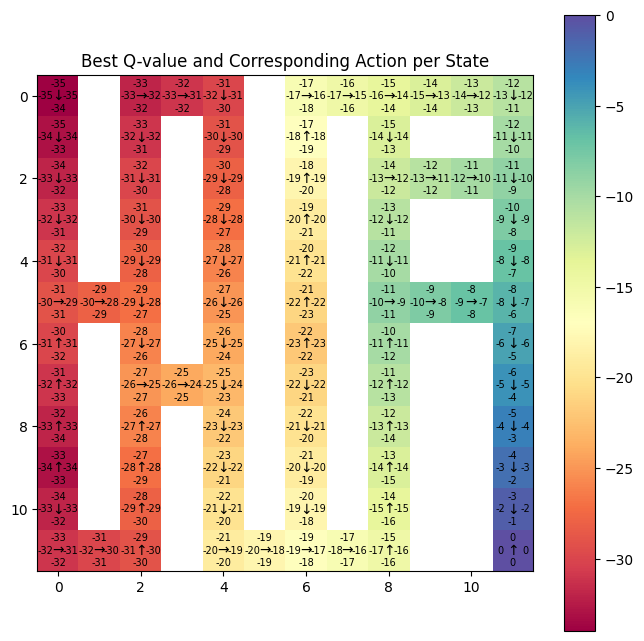

In [18]:
agent.plot_best_action_q_values()

In [19]:
def visualize_graph(G, env, critical_nodes, critical_edges):
    # Get node positions from env._state_to_grid
    pos = {state: env._state_to_grid[state] for state in G.nodes}

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Draw the graph
    nx.draw(G, pos, with_labels=False, node_color="black", node_size=100, ax=ax)

    # Highlight critical nodes and edges in red
    nx.draw_networkx_nodes(G, pos, nodelist=critical_nodes, node_color="red", node_size=100, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=critical_edges, edge_color="red", ax=ax)

    # Show the plot
    plt.show()

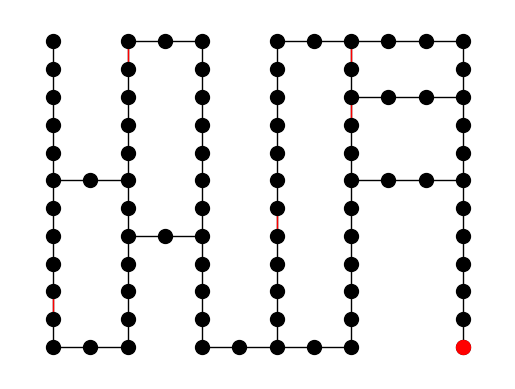

In [20]:
visualize_graph(G, env, critical_nodes, critical_edges)